
#### Submitted : Souradip Chakraborty 
#### UID : 118103136

In [1]:
import os
import numpy as np
from utils import run_tests
import data_generators
import copy
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from utils import run_tests
from tqdm import tqdm
from sklearn.metrics import r2_score
import sol_1a, sol_1b, sol_2a, sol_2b, sol_3a, sol_3b, sol_4a, sol_4b, sol_mnist
import public_tests as public_tests

In [2]:
def data_1a():
    x = (np.linspace(-2, 2, 60))[:, np.newaxis]
    y = 7*x + 3 + np.random.randn(60, 1)*0.9
    x_train = x[::2]
    y_train = y[::2]

    x_test = x[1::2]
    y_test = y[1::2]
    return {
        "train": (x_train, y_train),
        "test": (x_test, y_test)
    }


def plot_data(module_name):
    
    #initialize
    num_correct, num_total = 0,0
    
    #get the dataset
#     dataset = data_generators.generate_default_data(module_name)
    dataset = data_1a()
    
    #train_data
    x_train, y_train = dataset["train"]
    
    #test_data
    x_test, y_test = dataset["test"]
    
    #plot
    plt.scatter(x_train, y_train)
    plt.ylabel("Y_train")
    plt.xlabel("X_train")
    plt.title("Training Dataset {}".format(module_name))
    plt.show()
    sns.set()

def compute_mse(pred, y):
    return 1/2 * ((pred - y)**2).mean()
    

def test_final_mse(module_name, sol):
        
    #define the dataset
    dataset = data_generators.generate_default_data(module_name)
    trainer = sol.Trainer(lr)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    trainer.train(num_iter=trainer.get_num_iters_on_public_test())
    pred_train  = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_tr = compute_mse(pred_train, dataset["train"][1])
    print("Training mse", mse_tr)
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_te = compute_mse(pred, dataset["test"][1])
    print("Test mse", mse_te)
    
    return trainer

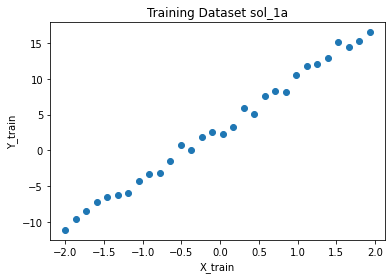

In [3]:
module_name = 'sol_1a'
plot_data(module_name)

### 1a : Plot showing the training data and the function that your network computes

The above plot represents the true dataset generated using the equation $y = 7x + 3 + \lambda \eta$ where $\eta \sim N(0,1)$. The data is generated as per the equation where we first generate the feature variable $x$ in a range, which has been taken as $-2,2$ and we take 60 sample points. Then, we use the above equation to get y. However, we add stochasticity to our $y$ by adding $\eta \sim N(0,1)$ and multiply with a coefficient. It can be easily seen as we increase the magnitude of $\eta$, the data becomes more noisy and it becomes harder to fit the same regression model

#### Training model

In [4]:
lr = 0.01
trainer_out = test_final_mse(module_name, sol_1a)

Training mse 0.006698267339882832
Test mse 0.00405390456981813


#### Get the model parameters and plot

Predicted parameters are :[7.022573514311726, 3.0107452155751973]


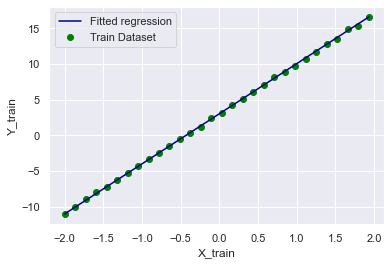

In [5]:
params = []
for m in trainer_out.network.get_modules_with_parameters() :
    params.append(m.W[0][0])
print ('Predicted parameters are :' + str(params))

#Get the plot for the 1-d function
dataset = data_generators.generate_default_data(module_name)

x_train = dataset['train'][0]
y_train = dataset['train'][1]

x_test = dataset['test'][0]
y_test = dataset['test'][1]

#plot for train and test
plt.scatter(x_train,y_train, color='green', label="Train Dataset")
plt.plot(x_train, params[0]*x_train + params[1], color='darkblue', label="Fitted regression")
plt.ylabel("Y_train")
plt.xlabel("X_train")
plt.legend()


It can also be clearly seen from the below plot that the performance is equally good in test data which indicates sign of generaliation and no overfitting. 

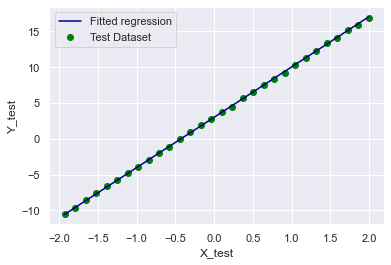

In [6]:
#plot for train and test
plt.scatter(x_test,y_test, color='green', label="Test Dataset")
plt.plot(x_test, params[0]*x_test + params[1], color='darkblue', label="Fitted regression")
plt.ylabel("Y_test")
plt.xlabel("X_test")
plt.legend()


Now, if we increase the noise in the data generation and try to implement the same process, we can see the variation below, that the line doesn't go through all the points but the line of best fit is constructed.

### 1b. Performasimilarexperimentusinghigher-dimensional input

Here we perform the same experiment, but we generate high-dimensional data and try the same excersise. We generate a 2 dimensional feature $X$ in a span of $-2, 2$ and we generate $y$ using the equation $2x_1 - 3x_2 + 5$. Then add gaussian noise as before to add stochasiticity to our dataset. As mentioned before, we add a constant factor of $0.1$ with the $\eta$ and as we increase it the magnitude of noise increases

In [7]:
#Read the data
dataset = data_generators.data_1b()
x_train = dataset['train'][0]
y_train = dataset['train'][1]

x_test = dataset['test'][0]
y_test = dataset['test'][1]


Text(0.5, 1.0, 'Scatter Plot in the Feature Space')

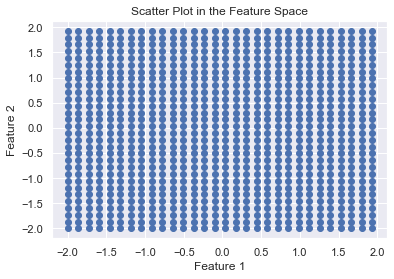

In [8]:
plt.scatter(x_train[:,0], x_train[:,1])
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.title('Scatter Plot in the Feature Space')

In [9]:
module_name = 'sol_1b'
lr = 0.2
trainer_out = test_final_mse(module_name, sol_1b)

Training mse 0.0048271322721568964
Test mse 0.004977502719641055


In [10]:
params = []
for m in trainer_out.network.get_modules_with_parameters() :
    params.append(m.W)
print ('Predicted parameters are :' + str(params))

Predicted parameters are :[array([[ 1.99967226],
       [-2.99995548]]), array([[4.99526843]])]


As it can be observed that the predicted parameters are extremely close to the true parameters which indicates good performance.

### 1c. How difficult was it to find an appropriate set of hyperparameters to solve this problem

Hyperparameter optimization for this task was not extremely difficult as its a linear problem with a convex loss function and it easily converges. the primary hyperparameter for this is the learning rate $\alpha$. The below plot shows the variation of the $MSE$ with the hyperparameters for problem $1a \& 1b$

In [11]:
def test_final_mse(module_name, sol, lr):
        
    #define the dataset
    dataset = data_generators.generate_default_data(module_name)
    trainer = sol.Trainer(lr)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    trainer.train(num_iter=trainer.get_num_iters_on_public_test())
    pred_train  = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_tr = compute_mse(pred_train, dataset["train"][1])
    print("Training mse", mse_tr)
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_te = compute_mse(pred, dataset["test"][1])
    print("Test mse", mse_te)
    
    return trainer, mse_te

In [12]:
list_lr = [0.00001, 0.001, 0.002, 0.005, 0.009, 0.01, 0.02, 0.03, 0.09, 0.1, 0.2, 0.5, 0.9,1,2,4]
module_name = 'sol_1a'
mse_1ist = []

for lr in tqdm(list_lr) :
    trainer, mse_te = test_final_mse(module_name, sol_1a, lr)
    mse_1ist.append(mse_te)

  6%|▋         | 1/16 [00:01<00:17,  1.16s/it]

Training mse 49.847741684624516
Test mse 51.315707884693936


 12%|█▎        | 2/16 [00:02<00:15,  1.14s/it]

Training mse 2.9542857339737965
Test mse 3.270052171679088


 19%|█▉        | 3/16 [00:03<00:14,  1.14s/it]

Training mse 0.31335195978815217
Test mse 0.31355604223117756


 25%|██▌       | 4/16 [00:04<00:13,  1.15s/it]

Training mse 0.0028510838026828173
Test mse 0.004063401808247527


 31%|███▏      | 5/16 [00:05<00:12,  1.16s/it]

Training mse 0.003498035032275408
Test mse 0.003934737603622898


 38%|███▊      | 6/16 [00:06<00:11,  1.15s/it]

Training mse 0.005572931694457297
Test mse 0.005584251325419443


 44%|████▍     | 7/16 [00:08<00:10,  1.16s/it]

Training mse 0.00684955455782631
Test mse 0.006475462049471845


 50%|█████     | 8/16 [00:09<00:09,  1.17s/it]

Training mse 0.003906605860319569
Test mse 0.0051549486857420225


 56%|█████▋    | 9/16 [00:10<00:08,  1.17s/it]

Training mse 0.004887950119941199
Test mse 0.004956531157656949


 62%|██████▎   | 10/16 [00:11<00:06,  1.16s/it]

Training mse 0.0037933096425594366
Test mse 0.00462492146620245


 69%|██████▉   | 11/16 [00:12<00:05,  1.16s/it]

Training mse 0.00458112343742106
Test mse 0.0036792216893684246


 75%|███████▌  | 12/16 [00:13<00:04,  1.15s/it]

Training mse 0.004931588771927603
Test mse 0.0051770443093320335


 81%|████████▏ | 13/16 [00:15<00:03,  1.16s/it]

Training mse 0.0027881491247816964
Test mse 0.006966052634701772


 88%|████████▊ | 14/16 [00:16<00:02,  1.36s/it]

Training mse 0.0045707252602117995
Test mse 0.0039516585680296435


 94%|█████████▍| 15/16 [00:18<00:01,  1.52s/it]

Training mse 0.0025112465321656054
Test mse 0.005060167459034968


100%|██████████| 16/16 [00:19<00:00,  1.25s/it]

Training mse 0.004609205719815308
Test mse 0.005376677931977782


### MSE  Plot Varying the learning rate for sol_1a

##### Note :In future steps, will be showing the analysis in log-10 scale for better understanding the difference

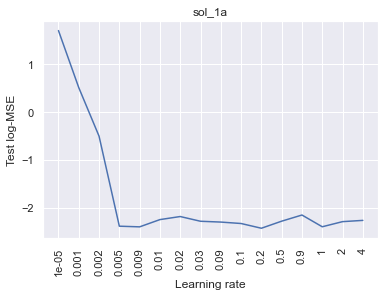

In [13]:
plt.plot([str(lr) for lr in list_lr], np.log10(mse_1ist))
plt.xlabel('Learning rate')
plt.ylabel('Test log-MSE') 
plt.title('sol_1a')
plt.xticks(rotation=90)
plt.show()

### Varying the learning rate for sol_1b


In [14]:
list_lr = [0.01, 0.02, 0.03, 0.09, 0.1, 0.2, 0.3, 0.6, 0.7, 0.9,1, 2, 4]
module_name = 'sol_1b'
mse_1ist = []

for lr in tqdm(list_lr) :
    trainer, mse_te = test_final_mse(module_name, sol_1b, lr)
    mse_1ist.append(mse_te)

  8%|▊         | 1/13 [00:01<00:22,  1.88s/it]

Training mse 6.920104085201847
Test mse 6.96408082524617


 15%|█▌        | 2/13 [00:03<00:20,  1.87s/it]

Training mse 5.810088190766128
Test mse 5.779023953951454


 23%|██▎       | 3/13 [00:05<00:18,  1.86s/it]

Training mse 3.0321208489492366
Test mse 3.0144277468120815


 31%|███       | 4/13 [00:07<00:16,  1.88s/it]

Training mse 0.052514051735766405
Test mse 0.05295739882887652


 38%|███▊      | 5/13 [00:09<00:15,  1.98s/it]

Training mse 0.02558393580607497
Test mse 0.026329066772829455


 46%|████▌     | 6/13 [00:11<00:14,  2.01s/it]

Training mse 0.005090436326494648
Test mse 0.005033888008296203


 54%|█████▍    | 7/13 [00:13<00:11,  1.98s/it]

Training mse 0.005254725938669286
Test mse 0.005092932338714106


 62%|██████▏   | 8/13 [00:15<00:09,  1.99s/it]

Training mse 0.0052525237181946065
Test mse 0.004798102232609628


 69%|██████▉   | 9/13 [00:17<00:08,  2.03s/it]

Training mse 0.004928096806507936
Test mse 0.004849689848953361


 77%|███████▋  | 10/13 [00:19<00:06,  2.06s/it]

Training mse 0.00503077310082004
Test mse 0.00540690187020851


 85%|████████▍ | 11/13 [00:21<00:04,  2.02s/it]

Training mse 0.005286993278513129
Test mse 0.0050401592133536574


 92%|█████████▏| 12/13 [00:23<00:02,  2.00s/it]

Training mse 0.0048179329309651344
Test mse 0.005380446907203988


100%|██████████| 13/13 [00:25<00:00,  1.98s/it]

Training mse 0.004939407660147204
Test mse 0.005090537636842236


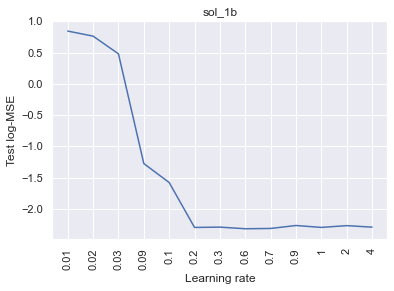

In [15]:
plt.plot([str(lr) for lr in list_lr], np.log10(mse_1ist))
plt.xlabel('Learning rate')
plt.ylabel('Test log-MSE') 
plt.title('sol_1b')
plt.xticks(rotation=90)
plt.show()

### 1c Explaination of learning rate

It is extremely clear from the analysis that for the problem 1, there is sensitivity of hyperparameters towards lower learning rate but that might be due to constraining the number of iterations. As, we can clearly see that keeping the no of iterations constant, learning rate of 1e-2 gives a higher MSE as it takes more time to converge. However, increasing the learning rate give a much better rate of convergence. One possible reason is that since the loss landscape is smooth and the function is convex, very high learning rate will give us quick convergence

### 2a.  Generate training data from a simple 1D function, such as a sine wave.

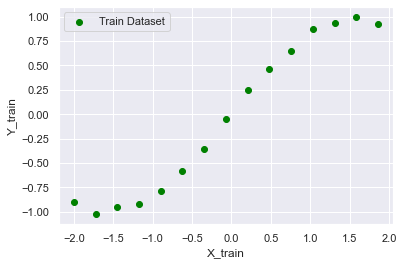

In [16]:
#Get the plot for the 1-d function
module_name = 'sol_2a'
dataset = data_generators.generate_default_data(module_name)

x_train, y_train = dataset['train']
x_test, y_test = dataset['test']


#plot for train and test
plt.scatter(x_train,y_train, color='green', label="Train Dataset")
plt.ylabel("Y_train")
plt.xlabel("X_train")
plt.legend()

### 2a. Data Generator
The above plot represents the true dataset generated using the equation $y = sinx + \lambda \eta$ where $\eta \sim N(0,1)$. The data is generated as per the equation where we first generate the feature variable $x$ in a range, which has been taken as $-2,2$ and we take 30 sample points. Then, we use the above equation to get y. However, we add stochasticity to our $y$ by adding $\eta \sim N(0,1)$ and multiply with a coefficient. 

#### 2a Model Fitting 

In [17]:
def test_final_mse(module_name, sol, lr):
        
    #define the dataset
    dataset = data_generators.generate_default_data(module_name)
    trainer = sol.Trainer(lr)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    trainer.train(num_iter=trainer.get_num_iters_on_public_test())
    pred_train  = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_tr = compute_mse(pred_train, dataset["train"][1])
    print("Training mse", mse_tr)
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_te = compute_mse(pred, dataset["test"][1])
    print("Test mse", mse_te)
    
    return trainer, mse_te, pred

In [18]:
module_name = 'sol_2a'
lr = 0.2
trainer, mse_te, pred = test_final_mse(module_name, sol_2a, lr)

Training mse 0.0005400950132147733
Test mse 0.002710698138013349


#### 2a Plotting the Test Function

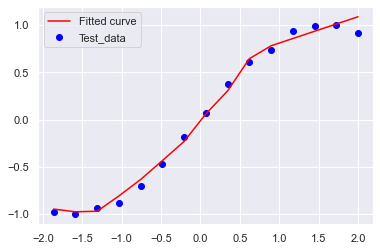

In [19]:
# plt.plot(pred)
plt.scatter(dataset["test"][0], dataset["test"][1], color = 'blue', label = 'Test_data')
plt.plot(dataset["test"][0], pred, color = 'red', label = 'Fitted curve' )
plt.legend()

### 2b.  Similar Experiment on High Dimensional Input

For this experiment, we generate the data using the $y = 1.7 x_1^2 + 0.6 x_2 + 2 + \lambda \eta$. Like before, we generate 60 samples within a range (-2,2) for each feature variable $x_1 \& x_2$
Then, we use the above equation to get y. However, we add stochasticity to our  𝑦  by adding  𝜂∼𝑁(0,1)  and multiply with a coefficient.

Text(0.5, 1.0, 'Scatter Plot in the Feature Space')

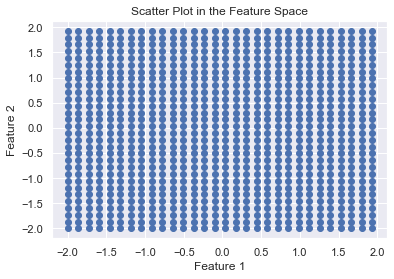

In [20]:
#Get the plot for the 1-d function
module_name = 'sol_2b'
dataset = data_generators.generate_default_data(module_name)

x_train, y_train = dataset['train']
x_test, y_test = dataset['test']

plt.scatter(x_train[:,0], x_train[:,1])
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.title('Scatter Plot in the Feature Space')



Let's also try to visualize and understand the scatter with y and each feature dimension

Text(0.5, 1.0, 'Scatter Plot with y and x1')

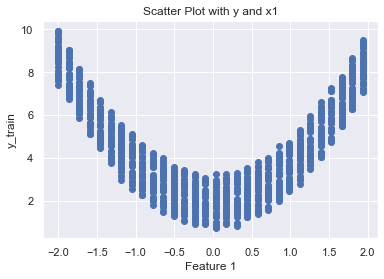

In [21]:
plt.scatter(x_train[:,0], y_train)
plt.ylabel("y_train")
plt.xlabel("Feature 1")
plt.title('Scatter Plot with y and x1')



Text(0.5, 1.0, 'Scatter Plot with y and x2')

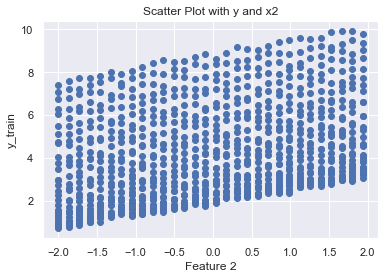

In [22]:
plt.scatter(x_train[:,1], y_train)
plt.ylabel("y_train")
plt.xlabel("Feature 2")
plt.title('Scatter Plot with y and x2')


#### 2b.  Model Fitting

Note : For this experiment, the number of neurons in the hidden units was kept as 40. 

In [23]:
module_name = 'sol_2b'
lr = 0.2
trainer, mse_te, pred = test_final_mse(module_name, sol_2b, lr)

Training mse 0.06947317081736472
Test mse 0.07570008089621408


### 2c || MSE Plot Varying the learning rate for sol_2a 

In [24]:
list_lr = [0.001, 0.01, 0.02, 0.03, 0.09, 0.1, 0.2, 0.7]
module_name = 'sol_2a'
mse_1ist = []

for lr in tqdm(list_lr) :
    trainer, mse_te, pred = test_final_mse(module_name, sol_2a, lr)
    mse_1ist.append(mse_te)

 12%|█▎        | 1/8 [00:02<00:18,  2.59s/it]

Training mse 0.009715244209630628
Test mse 0.015326284094394267
Training mse

 25%|██▌       | 2/8 [00:05<00:15,  2.57s/it]

 0.0028508319471039554
Test mse 0.0031944086448607383


 38%|███▊      | 3/8 [00:07<00:12,  2.60s/it]

Training mse 0.0006005970779130119
Test mse 0.0006115371298726755


 50%|█████     | 4/8 [00:10<00:10,  2.68s/it]

Training mse 0.0020083614757394233
Test mse 0.0026182483365218205


 62%|██████▎   | 5/8 [00:13<00:08,  2.69s/it]

Training mse 0.0009162541491341125
Test mse 0.0008826316348465944


 75%|███████▌  | 6/8 [00:16<00:05,  2.70s/it]

Training mse 0.0004615340235129315
Test mse 0.001150987781428446


 88%|████████▊ | 7/8 [00:18<00:02,  2.68s/it]

Training mse 0.0004481583621938628
Test mse 0.0016054617566399006
Training mse

100%|██████████| 8/8 [00:21<00:00,  2.66s/it]

 2.864007963509023e-05
Test mse 0.0004585814477727714


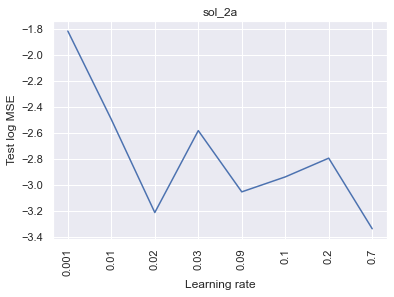

In [25]:
plt.plot([str(lr) for lr in list_lr], np.log10(mse_1ist))
plt.xlabel('Learning rate')
plt.ylabel('Test log MSE') 
plt.title('sol_2a')
plt.xticks(rotation=90)
plt.show()

### MSE Plot Varying the learning rate for sol_2b

In [26]:
list_lr = [0.001, 0.01, 0.02, 0.05, 0.1, 0.5, 1]
module_name = 'sol_2b'
mse_1ist = []

for lr in tqdm(list_lr) :
    trainer, mse_te, pred = test_final_mse(module_name, sol_2b, lr)
    mse_1ist.append(mse_te)

 14%|█▍        | 1/7 [00:21<02:08, 21.43s/it]

Training mse 6.135977447515897
Test mse 6.1742230460870475


 29%|██▊       | 2/7 [00:40<01:39, 19.89s/it]

Training mse 1.1800639967300417
Test mse 1.217671454338764


 43%|████▎     | 3/7 [00:57<01:14, 18.57s/it]

Training mse 0.7130856072019875
Test mse 0.7220520460432024


 57%|█████▋    | 4/7 [01:16<00:55, 18.66s/it]

Training mse 0.4051752565087358
Test mse 0.4137086831635234


 71%|███████▏  | 5/7 [01:32<00:36, 18.04s/it]

Training mse 0.12017887318513762
Test mse 0.11953752734744076


 86%|████████▌ | 6/7 [01:50<00:17, 17.76s/it]

Training mse 0.04253986596604324
Test mse 0.04657630744021718


100%|██████████| 7/7 [02:09<00:00, 18.55s/it]

Training mse 0.03570670588887418
Test mse 0.03927581736614776


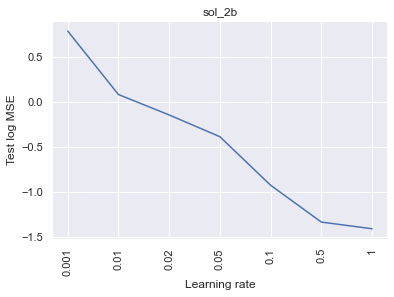

In [27]:
plt.plot([str(lr) for lr in list_lr], np.log10(mse_1ist))
plt.xlabel('Learning rate')
plt.ylabel('Test log MSE') 
plt.title('sol_2b')
plt.xticks(rotation=90)
plt.show()

### 2c : Analysis : 
It is extremely clear from the analysis that for the problem 1, there is sensitivity of hyperparameters towards lower learning rate but that might be due to constraining the number of iterations. As, we can clearly see that keeping the no of iterations constant, learning rate of 1e-2 gives a higher MSE as it takes more time to converge. However, increasing the learning rate give a much better rate of convergence. One possible reason is that since the loss landscape is smooth and the function is convex, very high learning rate will give us quick convergence


### 3 a. Experiment with using 3 and 5 hidden layers

For this problem, we will test the network with the same training data that we used in Problem 2, using both 1D and higher dimensional data. We will primarily experiment with 3 and 5 hidden layer performances

In [28]:
def test_final_mse(module_name, sol, lr, layers, neurons):
        
    #define the dataset
    dataset = data_generators.generate_default_data(module_name)
    trainer = sol.Trainer(lr, layers,neurons)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    train_losses = trainer.train(num_iter=trainer.get_num_iters_on_public_test())
    pred_train  = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_tr = compute_mse(pred_train, dataset["train"][1])
    print("Training mse", mse_tr)
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold?
    mse_te = compute_mse(pred, dataset["test"][1])
    print("Test mse", mse_te)
    
    return trainer, mse_te, pred, train_losses

### Analysis on 1 dimensional (low dim) Dataset 

#### Analysis with 3 layer network

In [29]:
module_name = 'sol_3a'
lr = 0.05
layers = 3
neurons = 10
trainer, mse_te, pred,_ = test_final_mse(module_name, sol_3a, lr, layers, neurons)

{'hidden_layers': 3, 'hidden_units': [10, 10, 1]}
Training mse 0.000490889542800981
Test mse 0.0011010464503417826


#### Analysis with 5 layer network

In [30]:
module_name = 'sol_3a'
lr = 0.05
layers = 5
neurons = 10
trainer, mse_te, pred, _ = test_final_mse(module_name, sol_3a, lr, layers, neurons)

{'hidden_layers': 5, 'hidden_units': [10, 10, 10, 10, 1]}
Training mse 0.00014023587488951907
Test mse 0.0009362261536064051


#### Analysis on high dimensional Dataset 


#### 3 layer network

In [31]:
module_name = 'sol_3b'
lr = 0.05
layers = 3
neurons = 10
trainer, mse_te, pred,_ = test_final_mse(module_name, sol_3b, lr, layers, neurons)

Training mse 0.05928986692163582
Test mse 0.060798486082263466


#### Analysis with 5 layer network

In [32]:
module_name = 'sol_3b'
lr = 0.05
layers = 5
neurons = 10
trainer, mse_te, pred, _ = test_final_mse(module_name, sol_3b, lr, layers, neurons)

Training mse 0.027131477119493357
Test mse 0.026810575529153675


### 3 b. Evaluating for different choices of Hyperparameters

#### Varying the learning rate for low dimensional data

In [33]:
list_lr = [0.001, 0.01, 0.02, 0.1, 0.5, 1, 5, 15, 20]
layers = 3
neurons = 5
module_name = 'sol_3a'
mse_1ist = []

for lr in tqdm(list_lr) :
    trainer, mse_te, pred, _ = test_final_mse(module_name, sol_3a, lr, layers, neurons)
    mse_1ist.append(mse_te)

  0%|          | 0/9 [00:00<?, ?it/s]

{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 11%|█         | 1/9 [00:04<00:33,  4.21s/it]

Training mse 0.21332635805008351
Test mse 0.19562644154601241
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 22%|██▏       | 2/9 [00:08<00:30,  4.35s/it]

Training mse 0.002700846554209902
Test mse 0.00242290002171687
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 33%|███▎      | 3/9 [00:12<00:25,  4.23s/it]

Training mse 0.006062611488727138
Test mse 0.008210487964482495
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}
Training mse

 44%|████▍     | 4/9 [00:16<00:20,  4.03s/it]

 0.00028474753928493
Test mse 0.000870166692597469
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 56%|█████▌    | 5/9 [00:20<00:15,  3.98s/it]

Training mse 0.0005172289802116895
Test mse 0.0006437759616955018
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 67%|██████▋   | 6/9 [00:24<00:11,  3.99s/it]

Training mse 0.00010163477446907962
Test mse 0.0009721244888423752
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 78%|███████▊  | 7/9 [00:28<00:07,  3.97s/it]

Training mse 0.0005110919595727206
Test mse 0.0010333611113843872
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 89%|████████▉ | 8/9 [00:32<00:03,  3.95s/it]

Training mse 0.3001733919016685
Test mse 0.3001737369318445
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


100%|██████████| 9/9 [00:36<00:00,  4.01s/it]

Training mse 0.30004512688824003
Test mse 0.302020119027743


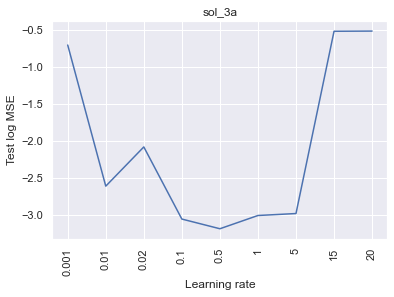

In [34]:
plt.plot([str(lr) for lr in list_lr], np.log10(mse_1ist))
plt.xlabel('Learning rate')
plt.ylabel('Test log MSE') 
plt.title('sol_3a')
plt.xticks(rotation=90)
plt.show()

#### Points
It can be clearly observed that the loss decreases with increasing learning rate upto a point, but after that point it becomes extremely unstable and test loss increases significantly, following the bias-variance trade-off rule. However,train loss also increases as the loss function is non-convex and the learning rate unstability plays a part

#### Varying the number of neurons for low dimensional data

In [35]:
neurons = [2,4,6, 8, 10, 20, 50, 80]
layers = 3
lr = 0.5
module_name = 'sol_3a'
mse_1ist = []

for neuron in tqdm(neurons) :
    trainer, mse_te, pred,_ = test_final_mse(module_name, sol_3a, lr, layers, neuron)
    mse_1ist.append(mse_te)

  0%|          | 0/8 [00:00<?, ?it/s]

{'hidden_layers': 3, 'hidden_units': [2, 2, 1]}


 12%|█▎        | 1/8 [00:03<00:27,  3.93s/it]

Training mse 0.0006249645403199696
Test mse 0.0006371410002766438
{'hidden_layers': 3, 'hidden_units': [4, 4, 1]}


 25%|██▌       | 2/8 [00:07<00:22,  3.79s/it]

Training mse 0.0007114308214237458
Test mse 0.0008951046402309127
{'hidden_layers': 3, 'hidden_units': [6, 6, 1]}


 38%|███▊      | 3/8 [00:11<00:18,  3.78s/it]

Training mse 0.00037988545094858294
Test mse 0.0006967972759097061
{'hidden_layers': 3, 'hidden_units': [8, 8, 1]}


 50%|█████     | 4/8 [00:15<00:14,  3.72s/it]

Training mse 4.680853614053572e-05
Test mse 0.0005925707115823909
{'hidden_layers': 3, 'hidden_units': [10, 10, 1]}


 62%|██████▎   | 5/8 [00:18<00:11,  3.80s/it]

Training mse 0.002022462253242609
Test mse 0.0025097905928764225
{'hidden_layers': 3, 'hidden_units': [20, 20, 1]}


 75%|███████▌  | 6/8 [00:23<00:07,  3.89s/it]

Training mse 1.1964436529142096e-05
Test mse 0.0011329385182853664
{'hidden_layers': 3, 'hidden_units': [50, 50, 1]}


 88%|████████▊ | 7/8 [00:28<00:04,  4.39s/it]

Training mse 2.8447681511887715e-06
Test mse 0.0006787052526735923
{'hidden_layers': 3, 'hidden_units': [80, 80, 1]}


100%|██████████| 8/8 [00:35<00:00,  4.45s/it]

Training mse 8.365381924769792e-07
Test mse 0.00037854563151684206


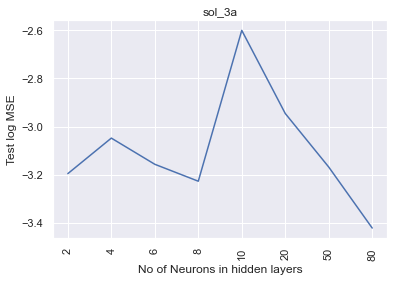

In [36]:
plt.plot([str(neuron) for neuron in neurons], np.log10(mse_1ist))
plt.xlabel('No of Neurons in hidden layers')
plt.ylabel('Test log MSE') 
plt.title('sol_3a')
plt.xticks(rotation=90)
plt.show()

#### Analysis 

Here, I vary the number of neruons in the hidden layers and it is very interesting to observe the loss landscape as the test loss decreases with the increase in number of neurons in the hidden layer till a point but then it starts to increase till the number reaches 8 neurons per layer. But, very interestingly, once it crosses that we are able to see a double decent type of event : overparametrized regime where the test loss decreases


#### Varying the learning rate for high dimensional data

In [37]:
list_lr = [0.001, 0.01, 0.02, 0.1, 0.5, 1]
layers = 3
neurons = 5
module_name = 'sol_3b'
mse_1ist = []

for lr in tqdm(list_lr) :
    trainer, mse_te, pred,_ = test_final_mse(module_name, sol_3b, lr, layers, neurons)
    mse_1ist.append(mse_te)

 17%|█▋        | 1/6 [00:13<01:07, 13.45s/it]

Training mse 8.333415628744403
Test mse 8.527450824969064


 33%|███▎      | 2/6 [00:27<00:55, 13.76s/it]

Training mse 0.8947481006793894
Test mse 0.9167827354787249


 50%|█████     | 3/6 [00:41<00:41, 13.72s/it]

Training mse 1.622278603318586
Test mse 1.8133174072569747


 67%|██████▋   | 4/6 [00:55<00:27, 13.81s/it]

Training mse 0.0883424478893764
Test mse 0.08519832193033265


 83%|████████▎ | 5/6 [01:08<00:13, 13.71s/it]

Training mse 0.031385300117881584
Test mse 0.03405337703924949


100%|██████████| 6/6 [01:22<00:00, 13.70s/it]

Training mse 0.029831965536229715
Test mse 0.02856439332858051


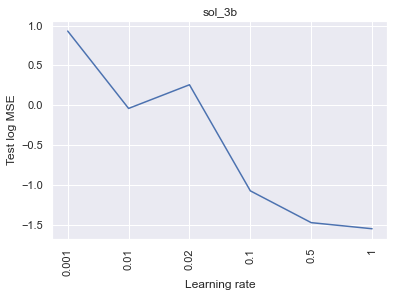

In [38]:
plt.plot([str(lr) for lr in list_lr], np.log10(mse_1ist))
plt.xlabel('Learning rate')
plt.ylabel('Test log MSE') 
plt.title('sol_3b')
plt.xticks(rotation=90)
plt.show()

#### Varying the number of neurons for high dimensional data¶

In [41]:
neurons = [2,4,6, 8, 10, 20]
layers = 3
lr = 0.5
module_name = 'sol_3b'
mse_1ist = []

for neuron in tqdm(neurons) :
    trainer, mse_te, pred,_ = test_final_mse(module_name, sol_3b, lr, layers, neuron)
    mse_1ist.append(mse_te)

 17%|█▋        | 1/6 [00:10<00:51, 10.22s/it]

Training mse 1.4582514801729238
Test mse 1.7155111865610637


 33%|███▎      | 2/6 [00:22<00:45, 11.37s/it]

Training mse 0.08657776055945512
Test mse 0.0884425909756506


 50%|█████     | 3/6 [00:37<00:38, 12.89s/it]

Training mse 0.02517314276526305
Test mse 0.02688561321969686


 67%|██████▋   | 4/6 [00:53<00:28, 14.45s/it]

Training mse 0.012011365029395673
Test mse 0.012252525687678187


 83%|████████▎ | 5/6 [01:13<00:16, 16.27s/it]

Training mse 0.0172654825662756
Test mse 0.019911678448318322


100%|██████████| 6/6 [02:12<00:00, 22.06s/it]

Training mse 0.007508734235775173
Test mse 0.008231172884007869


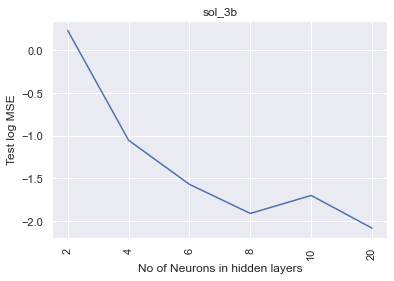

In [42]:
plt.plot([str(neuron) for neuron in neurons], np.log10(mse_1ist))
plt.xlabel('No of Neurons in hidden layers')
plt.ylabel('Test log MSE') 
plt.title('sol_3b')
plt.xticks(rotation=90)
plt.show()

### 3c Analysis : Depth Analysis for NN
        

In [43]:
layers = [2,3,4, 5,7, 8, 10, 15]
neurons = 5
lr = 0.5
module_name = 'sol_3a'
mse_1ist = []
total_loss_list = []

for layer in tqdm(layers) :
    trainer, mse_te, pred, train_loss  = test_final_mse(module_name, sol_3a, lr, layer, neurons)
    mse_1ist.append(mse_te)
    total_loss_list.append(train_loss)

 12%|█▎        | 1/8 [00:02<00:17,  2.46s/it]

{'hidden_layers': 2, 'hidden_units': [5, 1]}
Training mse 0.0009266609006955041
Test mse 0.0010880074553973667
{'hidden_layers': 3, 'hidden_units': [5, 5, 1]}


 25%|██▌       | 2/8 [00:06<00:19,  3.30s/it]

Training mse 0.00023213970228270808
Test mse 0.0006162086794408307
{'hidden_layers': 4, 'hidden_units': [5, 5, 5, 1]}


 38%|███▊      | 3/8 [00:11<00:20,  4.02s/it]

Training mse 0.0003253557237816922
Test mse 0.0010247924409924338
{'hidden_layers': 5, 'hidden_units': [5, 5, 5, 5, 1]}


 50%|█████     | 4/8 [00:17<00:19,  5.00s/it]

Training mse 0.2988834186963049
Test mse 0.30229003343054334
{'hidden_layers': 7, 'hidden_units': [5, 5, 5, 5, 5, 5, 1]}


 62%|██████▎   | 5/8 [00:26<00:18,  6.23s/it]

Training mse 0.00035441161967410614
Test mse 0.0005993009526396348
{'hidden_layers': 8, 'hidden_units': [5, 5, 5, 5, 5, 5, 5, 1]}


 75%|███████▌  | 6/8 [00:35<00:14,  7.36s/it]

Training mse 0.0003466101285530356
Test mse 0.0007065915883403129
{'hidden_layers': 10, 'hidden_units': [5, 5, 5, 5, 5, 5, 5, 5, 5, 1]}


 88%|████████▊ | 7/8 [00:48<00:09,  9.05s/it]

Training mse 0.000788749458847682
Test mse 0.0009024546932001537
{'hidden_layers': 15, 'hidden_units': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1]}


100%|██████████| 8/8 [01:06<00:00,  8.28s/it]

Training mse 0.0004125301505645554
Test mse 0.0006467359184179314


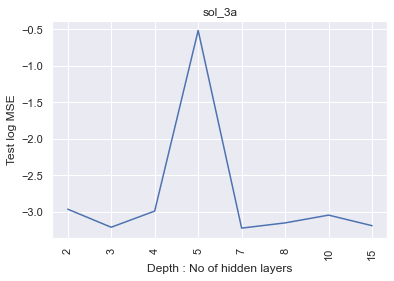

In [44]:
plt.plot([str(layer) for layer in layers], np.log10(mse_1ist))
plt.xlabel('Depth : No of hidden layers')
plt.ylabel('Test log MSE') 
plt.title('sol_3a')
plt.xticks(rotation=90)
plt.show()

#### Convergence Plot Analysis

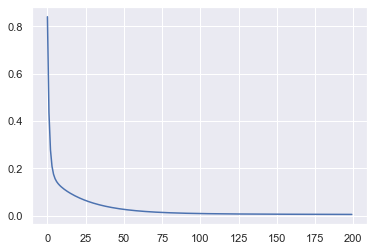

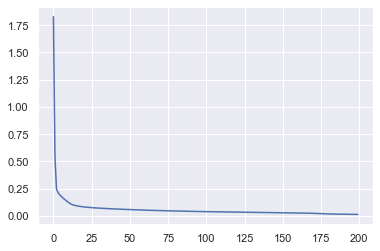

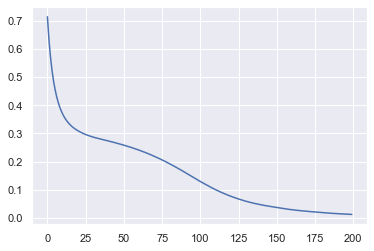

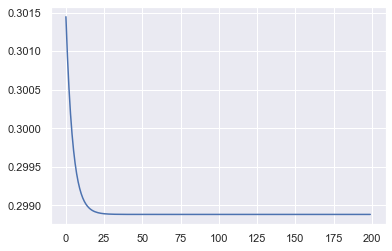

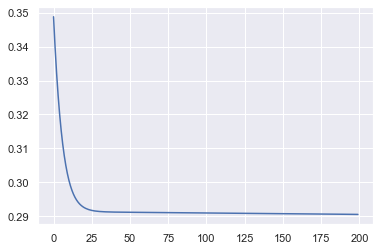

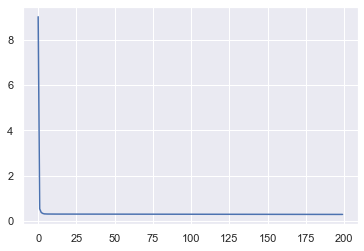

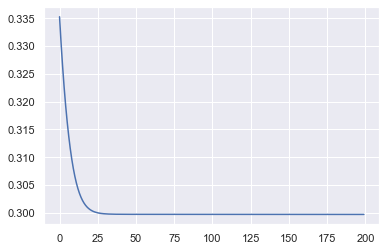

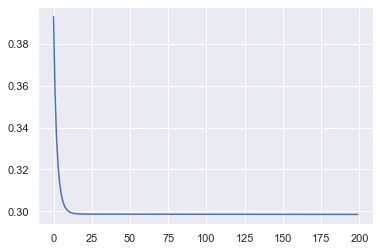

In [45]:
for i in range(0, len(total_loss_list)):
    plt.plot(total_loss_list[i][0:200])
    plt.show()

#### Analysis

It can be clearly observed that the loss decreases with increasing learning rate upto a point, but after that point it becomes extremely unstable and test loss increases significantly, following the bias-variance trade-off rule. However,train loss also increases as the loss function is non-convex and the learning rate unstability plays a part

Here, I vary the number of neruons in the hidden layers and it is very interesting to observe the loss landscape as the test loss decreases with the increase in number of neurons in the hidden layer till a point but then it starts to increase till the number reaches 8 neurons per layer. But, very interestingly, once it crosses that we are able to see a double decent type of event : overparametrized regime where the test loss decreases



Very similar to the above explaination,  test loss decreases with the increase in number of layers till a point but then it starts to increase till the number reaches 10/11. But, very interestingly, once it crosses that we are able to see a double decent type of event i.e overparametrized regime where the test loss decreases

### 4. Cross Entropy Loss

### 4a. Generating the Linearly Separable Data

In [46]:
def data_4a_new(margin):
    
    lambda1 = 2
    lambda2 = 6
    
    x1 = np.linspace(-3, 1, 60)[:, np.newaxis]
    x2 = np.linspace(margin+ lambda1 ,  margin + lambda2 , 60)[:, np.newaxis]
    
    #concatenate the data
    x = np.concatenate((x1, x2))
    y = np.where(x > 1, 1, 0)
    x_train = x[::2]
    y_train = y[::2]
    x_test = x[1::2]
    y_test = y[1::2]
    return {
        "train": (x_train, y_train),
        "test": (x_test, y_test)
    }

Text(0, 0.5, 'Y')

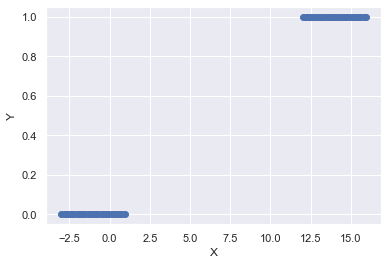

In [47]:
margin = 10
dataset = data_4a_new(margin)
plt.scatter(dataset['train'][0], dataset['test'][1])
plt.xlabel('X')
plt.ylabel('Y')

### 4a. Generating the Linearly Separable Data

The data is generated by the threshold of 1, when $x>1, y = 1$ else $y=0$. There are 60 datapoints that are being generated within the given range as shown in the figure. The margin determines the amount of linear separability will be there amongst the data. Higher the value of the margin, higher the linear separability

In [48]:
def compute_acc_sigmoid(pred, y):
  y_pred = np.where(pred > 0.5, 1, 0)
  return (y == y_pred).mean()

In [49]:
def test_final_loss(module_name, sol, lr, layers, neurons, margin, num_iter):
        
    #define the dataset
    dataset = data_4a_new(margin)
    trainer = sol.Trainer(lr, layers,neurons)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    train_losses = trainer.train(num_iter=num_iter)
    pred_train  = trainer.network.forward()
    train_acc = compute_acc_sigmoid(pred_train, dataset["train"][1])
    
    #Is final training loss less than some threshold?
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold
    test_acc = compute_acc_sigmoid(pred, dataset["test"][1])
    print("Test accuracy", test_acc)
    
    return trainer, test_acc, pred, np.array(train_losses)[:,0]

#### Margin = 1

In [50]:
lr = 0.05
module_name = 'sol_4a'
margin = 1
layers = 3
neurons = 10
num_iter = 10000
trainer, test_acc, pred, tr_loss = test_final_loss(module_name, sol_4a, lr, layers, neurons, margin,num_iter)

Test accuracy 1.0


Text(0, 0.5, 'Train loss')

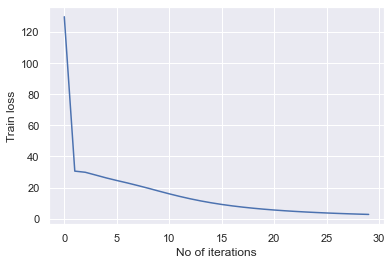

In [51]:
plt.plot(tr_loss[0:30])
plt.xlabel('No of iterations')
plt.ylabel('Train loss')

#### Varying the margin of the dataset

In [52]:
margin_list = [0.0001, 0.01, 0.02,1]
mse_1ist = []
total_loss_list = []

margin = 1
layers = 3
neurons = 5
num_iter = 1000

for margin in tqdm(margin_list) :
    trainer, test_acc, pred, train_loss = test_final_loss(module_name, sol_4a, lr, layers, neurons, margin, num_iter)
    total_loss_list.append(train_loss)

 50%|█████     | 2/4 [00:00<00:00,  5.46it/s]

Test accuracy 1.0
Test accuracy 1.0


100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

Test accuracy 1.0
Test accuracy 1.0


It can be clearly observed that as the margin increases, the test MSE decreases and the generalisability increases

##### Training loss converegence at lower margin

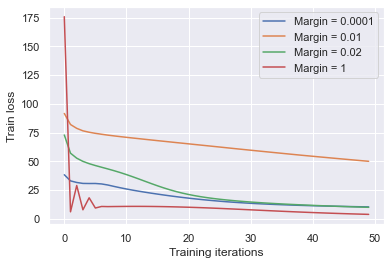

In [53]:
for m, loss in zip(margin_list, total_loss_list):  
    plt.plot(loss[0:50], label='Margin = {}'.format(m))

plt.xlabel('Training iterations')
plt.ylabel('Train loss')
plt.legend()
plt.show()


#### Varying the bumber of hidden layers of the network¶

In [54]:
layers = [2,3,4, 5,7, 8, 10, 15, 20, 50]

total_loss_list = []

margin = 1
neurons = 5
num_iter = 10000

for layer in tqdm(layers) :
    trainer, test_acc, pred, train_loss = test_final_loss(module_name, sol_4a, lr, layer, neurons, margin, num_iter)
    total_loss_list.append(train_loss)

 10%|█         | 1/10 [00:01<00:11,  1.33s/it]

Test accuracy 1.0


 20%|██        | 2/10 [00:03<00:12,  1.60s/it]

Test accuracy 1.0


 30%|███       | 3/10 [00:05<00:13,  1.92s/it]

Test accuracy 1.0


 40%|████      | 4/10 [00:08<00:13,  2.30s/it]

Test accuracy 1.0


 50%|█████     | 5/10 [00:11<00:13,  2.76s/it]

Test accuracy 1.0


 60%|██████    | 6/10 [00:16<00:13,  3.27s/it]

Test accuracy 1.0


 70%|███████   | 7/10 [00:21<00:11,  3.94s/it]

Test accuracy 1.0


 80%|████████  | 8/10 [00:30<00:10,  5.40s/it]

Test accuracy 1.0


 90%|█████████ | 9/10 [00:41<00:07,  7.25s/it]

Test accuracy 1.0


100%|██████████| 10/10 [01:07<00:00,  6.78s/it]

Test accuracy 0.5


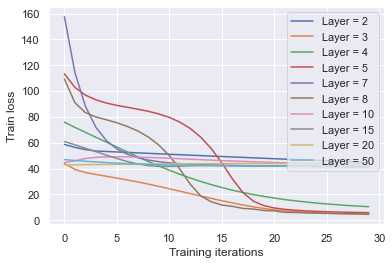

In [55]:
for l, loss in zip(layers, total_loss_list):  
    plt.plot(loss[0:30], label='Layer = {}'.format(l))

plt.xlabel('Training iterations')
plt.ylabel('Train loss')
plt.legend()
plt.show()


Analysis : It is clearly observed that as we increase the margin, the convergence rate becomes much faster and the network is able to converge to lower values at a faster rate. However, with network depth or increasing the number of layers, it can be observed that the train loss decreases.However, the test loss as it has been shown follows a curve which decreases and then increases and on over-parametrizing decreases

### 4a. Generating the Non-linearly Separable Data

For the non-linearly separable dataset, the data is generated in the range $(-2,2)$ and 60 datapoints are generated as before. Now, to add the non-linear aspect in the data the label is generated based on the nonlinear function $x^2 > 2$ the label is 1 else 0.

In [56]:
def data_4a_new1():
    
    # generating data
    x = np.linspace(-2, 2, 60)[:, np.newaxis]
    
    #eqyuation of non linearity
    y = np.where(x**2 > 2, 1, 0)
    
    #get the train and test
    x_train = x[::2]
    y_train = y[::2]
    x_test = x[1::2]
    y_test = y[1::2]
    
    return {
        "train": (x_train, y_train),
        "test": (x_test, y_test)
    }



In [60]:
def test_final_loss(module_name, sol, lr, layers, neurons, num_iter):
        
    #define the dataset
    dataset = data_4a_new1()
    trainer = sol.Trainer(lr, layers,neurons)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    train_losses = trainer.train(num_iter=num_iter)
    pred_train  = trainer.network.forward()
    train_acc = compute_acc_sigmoid(pred_train, dataset["train"][1])
    
    #Is final training loss less than some threshold?
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold
    test_acc = compute_acc_sigmoid(pred, dataset["test"][1])
    print("Test accuracy", test_acc)
    
    return trainer, test_acc, pred, np.array(train_losses)[:,0]

Text(0, 0.5, 'Y')

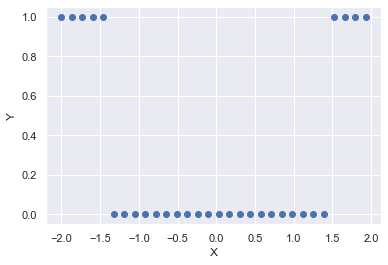

In [57]:
data = data_4a_new1()
plt.scatter(data['train'][0], data['train'][1])
plt.xlabel('X')
plt.ylabel('Y')

#### Training loss converegence

In [61]:
layers = [2,3,4, 5,7, 8, 10, 15, 20]

total_loss_list = []

neurons = 5
num_iter = 10000

for layer in tqdm(layers) :
    trainer, test_acc, pred, train_loss = test_final_loss(module_name, sol_4a, lr, layer, neurons, num_iter)
    total_loss_list.append(train_loss)

 11%|█         | 1/9 [00:01<00:09,  1.22s/it]

Test accuracy 0.9666666666666667


 22%|██▏       | 2/9 [00:02<00:10,  1.53s/it]

Test accuracy 0.9933333333333333


 33%|███▎      | 3/9 [00:05<00:11,  1.84s/it]

Test accuracy 0.96


 44%|████▍     | 4/9 [00:07<00:11,  2.23s/it]

Test accuracy 0.9666666666666667


 56%|█████▌    | 5/9 [00:11<00:10,  2.63s/it]

Test accuracy 0.9666666666666667


 67%|██████▋   | 6/9 [00:15<00:09,  3.07s/it]

Test accuracy 0.9666666666666667


 78%|███████▊  | 7/9 [00:19<00:07,  3.56s/it]

Test accuracy 0.9666666666666667


 89%|████████▉ | 8/9 [00:26<00:04,  4.54s/it]

Test accuracy 0.7


100%|██████████| 9/9 [00:35<00:00,  3.95s/it]

Test accuracy 0.7


#### Test accuracy
Also, it is visible that the test accuracy increases till a point, however after increasing the number of parameters more there is a decrease in the test accuracy i.e it starts to overfit

#### Loss Convergence Analysis

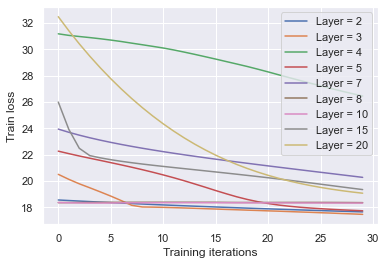

In [62]:
for l, loss in zip(layers, total_loss_list):  
    plt.plot(loss[0:30], label='Layer = {}'.format(l))

plt.xlabel('Training iterations')
plt.ylabel('Train loss')
plt.legend()
plt.show()


### 4b. Generating the Linearly Separable Data High D

The linearly separable high-dimensional data is generated almost similar to the previous case, but here the separability is maintained in both the axis. So, the range is $-m-1, -m$ is labelled as 0 and $m, m+1$ is labelled as 1 and like before 60 samples are generated

In [63]:
def data_4b_new(margin):
    
    x = np.stack(np.linspace(-margin-1, -margin, 60).tolist() + np.linspace(margin, margin+1, 60).tolist())
    x = x[:, np.newaxis]
    y = np.where(x > 0, 1, 0)
    x = np.repeat(x, 2, axis=1)
    x_train = x[::2]
    y_train = y[::2]
    x_test = x[1::2]
    y_test = y[1::2]
    return {'train': (x_train, y_train), 'test': (x_test, y_test)}

Text(0, 0.5, 'Y')

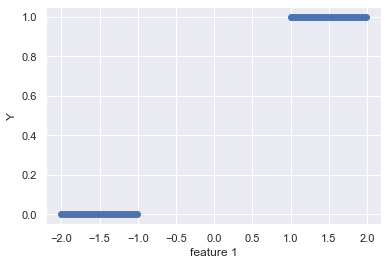

In [64]:
margin = 1
dataset = data_4b_new(margin)
plt.scatter(dataset['train'][0][:,0], dataset['train'][1])
plt.xlabel('feature 1')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

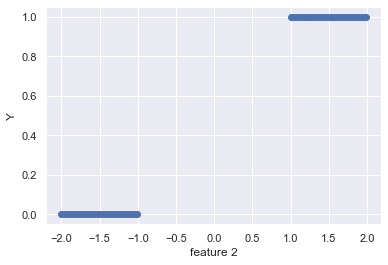

In [65]:
margin = 1
dataset = data_4b_new(margin)
plt.scatter(dataset['train'][0][:,1], dataset['train'][1])
plt.xlabel('feature 2')
plt.ylabel('Y')

In [66]:
def test_final_loss(module_name, sol, lr, layers, neurons, num_iter, margin):
        
    #define the dataset
    dataset = data_4b_new(margin)
    trainer = sol.Trainer(lr, layers,neurons)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    train_losses = trainer.train(num_iter=num_iter)
    pred_train  = trainer.network.forward()
    train_acc = compute_acc_sigmoid(pred_train, dataset["train"][1])
    
    #Is final training loss less than some threshold?
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold
    test_acc = compute_acc_sigmoid(pred, dataset["test"][1])
    print("Test accuracy", test_acc)
    
    return trainer, test_acc, pred, np.array(train_losses)[:,0]

#### Varying the margin of the dataset

In [67]:
margin_list = [0.0001, 0.01, 0.02,0.03, 0.1,1]
total_loss_list = []

layers = 3
neurons = 5
num_iter = 1000

for margin in tqdm(margin_list) :
    trainer, test_acc, pred, train_loss = test_final_loss(module_name, sol_4b, lr, layers, neurons, num_iter, margin)
    total_loss_list.append(train_loss)

 33%|███▎      | 2/6 [00:00<00:00,  5.92it/s]

Test accuracy 0.9833333333333333
Test accuracy 1.0


 67%|██████▋   | 4/6 [00:00<00:00,  6.13it/s]

Test accuracy 1.0
Test accuracy 1.0


100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

Test accuracy 1.0
Test accuracy 1.0


#### Loss Convergence Analysis

#### Note : 

I am showing the plot for initial epochs to understand the convergence properly, otherwise it converges when i see the full number of iterations 

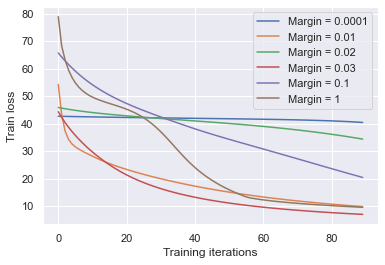

In [68]:
for m, loss in zip(margin_list, total_loss_list):  
    plt.plot(loss[0:90], label='Margin = {}'.format(m))

plt.xlabel('Training iterations')
plt.ylabel('Train loss')
plt.legend()
plt.show()


### Analysis 4b - p1

Interesting, it can be seen that the test accuracy increases with the margin and as the margin increases, it increases quickly. However, after a point it doesn't matter and even though we increase the margin, the model is gicing the best test acuuracy.
##### Intuition: It has learnt the highest margin boundary like SVM.

Even for the loss convergence analysis, we see that with increasing margin, the speed of convergence increases and network quickly converges to the optimal

### Varying the number of hidden layers of the dataset

In [69]:
layers = [2,3,4, 5,7, 8, 10, 15]

total_loss_list = []

margin = 1
neurons = 5
lr = 0.1
num_iter = 10000

for layer in tqdm(layers) :
    trainer, test_acc, pred, train_loss = test_final_loss(module_name, sol_4b, lr, layer, neurons, num_iter, margin)
    total_loss_list.append(train_loss)

 12%|█▎        | 1/8 [00:01<00:07,  1.12s/it]

Test accuracy 1.0


 25%|██▌       | 2/8 [00:02<00:08,  1.37s/it]

Test accuracy 1.0


 38%|███▊      | 3/8 [00:04<00:08,  1.68s/it]

Test accuracy 1.0


 50%|█████     | 4/8 [00:08<00:09,  2.36s/it]

Test accuracy 1.0


 62%|██████▎   | 5/8 [00:11<00:08,  2.85s/it]

Test accuracy 1.0


 75%|███████▌  | 6/8 [00:15<00:06,  3.21s/it]

Test accuracy 0.5


 88%|████████▊ | 7/8 [00:20<00:03,  3.81s/it]

Test accuracy 1.0


100%|██████████| 8/8 [00:28<00:00,  3.54s/it]

Test accuracy 0.5


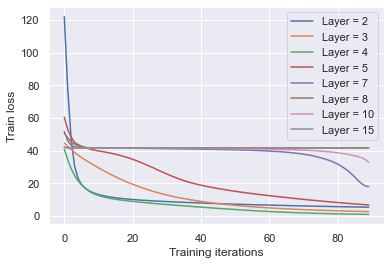

In [70]:
for l, loss in zip(layers, total_loss_list):  
    plt.plot(loss[0:90], label='Layer = {}'.format(l))

plt.xlabel('Training iterations')
plt.ylabel('Train loss')
plt.legend()
plt.show()


### 4b. Generating the Non-Linearly Separable Data High D¶

In this case of generating the data, non linearly we deifine two univariate gaussian $x, y \sim N(0,1)$ and define a latent condition $2x_1^2 + 3x^2 >0, y= 1$ else $y=0$ which defines the non linear decission boundary

In [71]:
def data_4b_new1():
    
    lamda = 2
    #Partitions to split the N observations.
    x1 = np.random.normal(0, 1, 300)
    x2 = np.random.normal(0, 1, 300)
    
    # save toy dataset
    x_full = np.vstack((x1, x2)).T
    y_full = np.where(2*x1**2 + 3*x2  > 0, 1, 0)
    x_train = x_full[::2]
    y_train = y_full[::2]
    x_test = x_full[1::2]
    y_test = y_full[1::2]
   
    
    #get the final
    return {
        "train": (x_train, y_train.reshape(-1,1)),
        "test": (x_test, y_test.reshape(-1,1))
    }


In [72]:
dataset = data_4b_new1()
df = pd.DataFrame()
df['feat1'] = dataset['train'][0][:,0]
df['feat2'] = dataset['train'][0][:,1]
df['response'] = dataset['train'][1]

<AxesSubplot:xlabel='feat1', ylabel='feat2'>

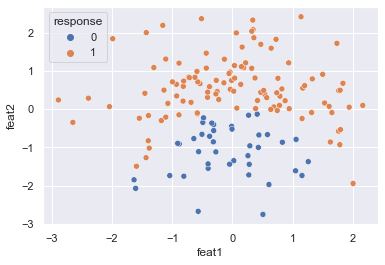

In [73]:
sns.scatterplot(data=df, x="feat1", y="feat2", hue="response")

#### Varying the Layers

In [74]:
def test_final_loss(module_name, sol, lr, layers, neurons, num_iter):
        
    #define the dataset
    dataset = data_4b_new1()
    trainer = sol.Trainer(lr, layers,neurons)
     
    #initialize the network with 
    trainer.setup(dataset["train"])
    
    #train the network
    train_losses = trainer.train(num_iter=num_iter)
    pred_train  = trainer.network.forward()
    train_acc = compute_acc_sigmoid(pred_train, dataset["train"][1])
    
    #Is final training loss less than some threshold?
    
    #test the data on hold-out set
    trainer.data_layer.set_data(dataset["test"][0])
    pred = trainer.network.forward()
    
    #Is final training loss less than some threshold
    test_acc = compute_acc_sigmoid(pred, dataset["test"][1])
    print("Test accuracy", test_acc)
    
    return trainer, test_acc, pred, np.array(train_losses)[:,0]

In [75]:
layers = [2,3,4, 5,7, 8, 10, 15, 20, 50]

total_loss_list = []

neurons = 5
num_iter = 10000

for layer in tqdm(layers) :
    trainer, test_acc, pred, train_loss = test_final_loss(module_name, sol_4a, lr, layer, neurons, num_iter)
    total_loss_list.append(train_loss)

 10%|█         | 1/10 [00:01<00:16,  1.78s/it]

Test accuracy 0.9813333333333333


 20%|██        | 2/10 [00:04<00:16,  2.11s/it]

Test accuracy 0.9866666666666667


 30%|███       | 3/10 [00:07<00:17,  2.51s/it]

Test accuracy 0.9933333333333333


 40%|████      | 4/10 [00:10<00:17,  2.99s/it]

Test accuracy 0.9866666666666667


 50%|█████     | 5/10 [00:16<00:19,  3.95s/it]

Test accuracy 0.9653333333333334


 60%|██████    | 6/10 [00:22<00:18,  4.50s/it]

Test accuracy 0.6533333333333333


 70%|███████   | 7/10 [00:28<00:15,  5.21s/it]

Test accuracy 0.66


 80%|████████  | 8/10 [00:38<00:13,  6.68s/it]

Test accuracy 0.7


 90%|█████████ | 9/10 [00:51<00:08,  8.48s/it]

Test accuracy 0.6866666666666666


100%|██████████| 10/10 [01:22<00:00,  8.29s/it]

Test accuracy 0.7266666666666667


#### Varying Learning rate

In [76]:
lr_list = [0.0001, 0.001, 0.002, 0.01, 0.1, 0.5, 1]
total_loss_list = []

neurons = 5
layer = 5
num_iter = 10000

for lr in tqdm(lr_list) :
    trainer, test_acc, pred, train_loss = test_final_loss(module_name, sol_4a, lr, layer, neurons, num_iter)
    total_loss_list.append(train_loss)

 14%|█▍        | 1/7 [00:03<00:21,  3.64s/it]

Test accuracy 0.68


 29%|██▊       | 2/7 [00:07<00:18,  3.61s/it]

Test accuracy 0.9373333333333334


 43%|████▎     | 3/7 [00:11<00:14,  3.69s/it]

Test accuracy 0.9733333333333334


 57%|█████▋    | 4/7 [00:14<00:11,  3.67s/it]

Test accuracy 0.96


 71%|███████▏  | 5/7 [00:18<00:07,  3.61s/it]

Test accuracy 0.9666666666666667


 86%|████████▌ | 6/7 [00:21<00:03,  3.58s/it]

Test accuracy 0.9666666666666667


100%|██████████| 7/7 [00:25<00:00,  3.60s/it]

Test accuracy 0.8066666666666666


#### Analysis : 

+ It is very intuitive to see and understand that as we increase the number of layers, the test accuracy increases till a point but then it decreases due to overfitting. 

+ Also, for the non-linear separable and high dimensional cases the learning rate was a bit sensitive to very low or very high values. Hence, the learning rate should be in range of [0.01, 0.1], to have the most stable performance

#### 5. MNIST Data Analysis

In [78]:
mnist = np.load("/Users/schakra3/PS1_828L/mnist.pkl", allow_pickle=True)
x_train = mnist["training_images"]
y_train = mnist["training_labels"]
x_test = mnist["test_images"]
y_test = mnist["test_labels"]
trainer = sol_mnist.Trainer()



In [81]:
def compute_acc_softmax(pred, y):
  y_pred = np.argmax(pred, axis=-1)
  return (y == y_pred).mean()

In [83]:
trainer.setup((x_train, y_train))
trainer.network.load_state_dict(np.load("mnist_weight.npz", allow_pickle=True)["weight"])

trainer.data_layer.set_data(x_test)
#Is final training loss less than some threshold?
pred = trainer.network.forward()
acc = compute_acc_softmax(pred, y_test)
print (acc)

0.9373


I use node_list = [20,20,20,20,10], n_layers = 5 , batch_size = 128 and randomly sample batches and train for 20,000 iterations. The test accuracy received is 94% as shown
